# ATSC 507 Assignment II - Due Feb 26

In [1]:
__author__ = 'Yingkai (Kyle) Sha'
__email__  = 'yingkai@eos.ubc.ca' 

In [2]:
import glob
import numpy as np
import netCDF4 as nc
from skewt import SkewT
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
% matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

#Content

1. [**Read WRF output**](#Read-WRF-output)
1. [**Movie I**](#Movie-I)
1. [**Movie II**](#Movie-II)
1. [**Other movies**](#Other-movies)

#Read WRF output

In [4]:
filename=glob.glob('_data/wrfpost.nc')[0]
nc_obj=nc.Dataset(filename)

printing all the variables.

In [5]:
print(nc_obj.variables.keys())

[u'time', u'DateTime', u'year', u'month', u'day', u'hour', u'minute', u'pressure', u'eta', u'p_top', u'lat', u'lon', u'Z_sfc', u'SST', u'T_sfc', u'p_sfc', u'slp', u'T_2m', u'theta_2m', u'Td_2m', u'r_v_2m', u'q_2m', u'rh_2m', u'u_10m_gr', u'v_10m_gr', u'u_10m_tr', u'v_10m_tr', u'ws_10m', u'wd_10m', u'precip_g', u'precip_c', u'pblh', u'nest_p', u'r_cloud', u'r_rain', u'Z_p', u'T_p', u'theta_p', u'Td_p', u'r_v_p', u'q_p', u'rh_p', u'u_tr_p', u'v_tr_p', u'ws_p', u'wd_p', u'w_p', u'pvo_p', u'avo_p', u'SW_d', u'LW_d', u'albedo', u'SH', u'LH', u'u_star', u'LWP', u'IWP', u'LandMask', u'LandUse', u'SeaIce']


Get lat/lon for plots.

In [6]:
latitude = nc_obj.variables['lat'][:]
longitude = nc_obj.variables['lon'][:]
plev = nc_obj.variables['pressure'][:]
time = ['2000-01-24 12:00:00', '2000-01-24 15:00:00', '2000-01-24 18:00:00', '2000-01-24 21:00:00', '2000-01-25 00:00:00']

Plot WRF domain.

In [7]:
latlim=[22.5, 45]
lonlim=[-95, -62.5]

In [8]:
mapkeys=dict(projection='lcc',\
             lat_1=30, lat_2=60, lat_0=45, lon_0=-80,\
             llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
             urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
             resolution='l')
SIGN = 'Created by Yingkai (Kyle) Sha.\nFor ATSC-507 Assignment II only.'

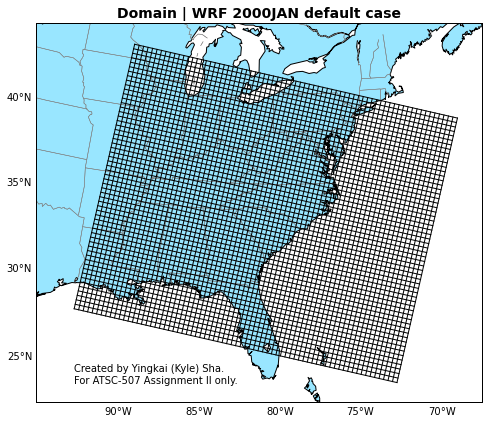

In [9]:
fig=plt.figure(figsize=(8, 8))
ax=fig.gca()
proj=Basemap(**mapkeys)
# draw coast line
proj.drawcoastlines(linewidth=1, color='k')
proj.fillcontinents(color=[0.6, 0.9, 1.0], lake_color=None, ax=ax, zorder=0, alpha=None)
proj.drawstates(color=[0.5, 0.5, 0.5], linewidth=0.5)
# draw parallels/meridians.
parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
# transfer from Lat/Lon to projected grid
x, y=proj(longitude, latitude)
proj.plot(x, y, 'k-', linewidth=1.0);
proj.plot(x.T, y.T, 'k-', linewidth=1.0);
plt.text(x[0, 0], y[0, 0]*0.2, SIGN, fontsize=10)
ax.set_title('Domain | WRF 2000JAN default case', fontweight='bold', fontsize=14)

#Movie I
* sea-level pressure (as black contour lines, every 2 hPa between 980 and 1030 hPa, with base contour of 1000 hPa) and
* colour shaded potential temperature (between 270 and 300 K), at the 850 hPa level.

In [10]:
# contour SLP + pcolor Theta
slp_lev = np.arange(980, 1030+2, 2)
theta_lim = [270, 300]

In [11]:
SLP = nc_obj.variables['slp'][:]
Theta = nc_obj.variables['theta_p'][:][:, plev==850, :, :]

Define plotting function for animation.

In [12]:
def view1_movie(time_step):
    plt.cla()
    ax=fig.gca()
    proj=Basemap(**mapkeys)
    # draw coast line
    proj.drawcoastlines(linewidth=1, color=[0.35, 0.35, 0.35])
    proj.drawstates(color=[0.35, 0.35, 0.35], linewidth=0.5)
    # draw parallels/meridians.
    parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
    proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
    proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
    # transfer from Lat/Lon to projected grid
    x, y=proj(longitude, latitude)
    CS1=proj.contour(x, y, SLP[time_step, :, :], slp_lev, colors = ('k',), linewidths=1.5)
    CS2=proj.pcolor(x, y, Theta[time_step, 0, :, :], vmin=theta_lim[0], vmax=theta_lim[1], cmap=plt.cm.coolwarm) # RdBu_r
    CBar=proj.colorbar(CS2, location='right', size='5%', pad='2%')
    CBar.set_label('850hPa Potential Temperature ( K )', fontsize=10)
    CBar.ax.tick_params(axis='y', length=0)
    plt.clabel(CS1, slp_lev[1::2], inline=1, fmt='%1.0f', fontsize=8)
    plt.text(x[0, 0], y[0, 0]*0.5, 'Time: '+time[time_step], fontsize=10)
    plt.text(x[0, 0], y[0, 0]*0.2, SIGN, fontsize=10)
    ax.set_title('SLP + Potential Temp. | WRF 2000JAN default case', fontweight='bold', fontsize=14)

Creat movie + the last frame.

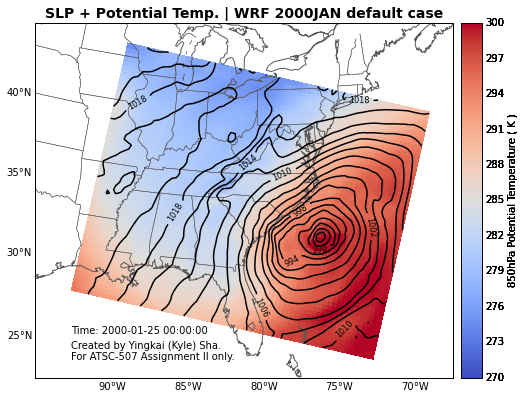

In [13]:
fig=plt.figure(figsize=(8, 8))
ani_obj=animation.FuncAnimation(fig, view1_movie, frames=5, interval=10000000)
writer_obj=animation.FFMpegFileWriter()
ani_obj.save('movie1.mp4', writer = writer_obj, metadata={'author':'Yingkai (Kyle) Sha'})

# Movie II

* 250 hPa geopotential heights (as black contour lines).
* Colour shaded 250 kPa wind speeds.

In [14]:
# contour 250hPa GPH + pcolor Wind-speed
GPH_lev = np.arange(10000, 10800+80, 80)
WS_lim = [0, 80]

In [15]:
GPH = nc_obj.variables['Z_p'][:][:, plev==250, :, :]
WSpeed = nc_obj.variables['ws_p'][:][:, plev==250, :, :]

In [16]:
def view2_movie(time_step):
    time_step=time_step%5
    plt.cla()
    ax=fig.gca()
    proj=Basemap(**mapkeys)
    proj.drawcoastlines(linewidth=1, color='k')
    proj.drawstates(color=[0.35, 0.35, 0.35], linewidth=0.5)
    parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
    proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
    proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
    x, y=proj(longitude, latitude)
    CS1=proj.contour(x, y, GPH[time_step, 0, :, :], GPH_lev, colors = ('k',), linewidths=3)
    CS2=proj.pcolor(x, y, WSpeed[time_step, 0, :, :], vmin=WS_lim[0], vmax=WS_lim[1], cmap=plt.cm.gist_ncar_r) # RdBu_r
    CBar=proj.colorbar(CS2, location='right', size='5%', pad='2%')
    CBar.set_label('250hPa Wind speed ( m/s )', fontsize=10)
    CBar.ax.tick_params(axis='y', length=0)
    plt.clabel(CS1, GPH_lev[1::2], inline=1, fmt='%1.0f', fontsize=8)
    plt.text(x[0, 0], y[0, 0]*0.5, 'Time: '+time[time_step], fontsize=10)
    plt.text(x[0, 0], y[0, 0]*0.2, SIGN, fontsize=10)
    ax.set_title('GPH + Wind speed. | WRF 2000JAN default case', fontweight='bold', fontsize=14)

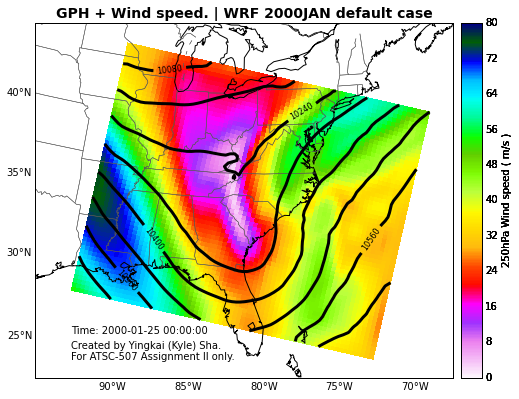

In [17]:
fig=plt.figure(figsize=(8, 8))
ani_obj=animation.FuncAnimation(fig, view2_movie, frames=5, interval=10000000)
writer_obj=animation.FFMpegFileWriter()
ani_obj.save('movie2.mp4', writer = writer_obj, metadata={'author':'Yingkai (Kyle) Sha'})

# Other movies

* Accumulated Precipitation (Accumulated Total Grid Scale Precipitation in mm).

In [18]:
precip_lev = [0, 0.5, 1, 1.5, 2.5, 5, 7.5, 10, 15, 20, 30, 40, 55, 75, 100, 300]
precip = nc_obj.variables['precip_g'][:]

In [19]:
def view3_movie(time_step):
    time_step = time_step%5
    plt.cla()
    ax=fig.gca()
    proj=Basemap(**mapkeys)
    proj.drawcoastlines(linewidth=1, color='k')
    proj.drawstates(color=[0.35, 0.35, 0.35], linewidth=0.5)
    parallels = np.arange(0, 90, 5); meridians = np.arange(180, 360, 5)
    proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
    proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
    x, y=proj(longitude, latitude)
    CS=proj.contourf(x, y, precip[time_step, :, :], precip_lev, cmap=cm.s3pcpn)
    CBar=proj.colorbar(CS, location='right', size='5%', pad='2%')
    CBar.set_label('Accumulated Precipitation ( mm )', fontsize=10)
    CBar.ax.tick_params(axis='y', length=0)
    plt.text(x[0, 0], y[0, 0]*0.5, 'Time: '+time[time_step], fontsize=10)
    plt.text(x[0, 0], y[0, 0]*0.2, SIGN, fontsize=10)
    ax.set_title('Accumu. Precip. | WRF 2000JAN default case', fontweight='bold', fontsize=14)

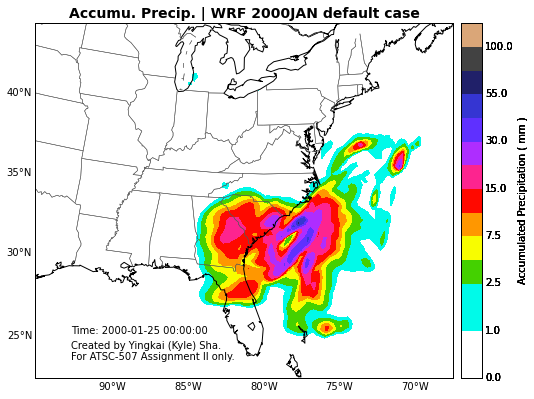

In [20]:
fig=plt.figure(figsize=(8, 8))
ani_obj=animation.FuncAnimation(fig, view3_movie, frames=5, interval=10000000)
writer_obj=animation.FFMpegFileWriter()
ani_obj.save('movie3.mp4', writer = writer_obj, metadata={'author':'Yingkai (Kyle) Sha'})